In [3]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
from matplotlib import cm
import matplotlib
import numpy as np
import pingouin as pg
from collections import Counter
from paired_connectivity_analyzer import EEGPairedPermutationAnalyser, DrawEEG
from plotting_utils import plot_compute_sign_differences, draw_edges_by_dict, plot_reproducibility_pattern, plot_reproducibility_by_frequency

from statistics import mean
from metrics import dice, jaccard

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_csv('eeg_dataframe_nansfilled.csv', index_col=0)
analyzer = EEGPairedPermutationAnalyser(data_df=df, num_perm=1000, thres=0.001)

In [5]:
df

,Fp1/Fp2_1_fo,Fp1/F7_1_fo,Fp1/F3_1_fo,Fp1/Fz_1_fo,Fp1/F4_1_fo,Fp1/F8_1_fo,Fp1/T3_1_fo,Fp1/C3_1_fo,Fp1/Cz_1_fo,Fp1/C4_1_fo,...,Pz/P4_7_fz,Pz/T6_7_fz,Pz/O1_7_fz,Pz/O2_7_fz,P4/T6_7_fz,P4/O1_7_fz,P4/O2_7_fz,T6/O1_7_fz,T6/O2_7_fz,O1/O2_7_fz
abs_,-0.067816,-0.190843,0.197049,0.082941,-0.431078,-0.880805,-1.597362,-0.486399,-0.505033,-0.634386,...,-0.369614,-1.591706,-0.671730,-0.722746,-1.030530,-1.353433,-0.547397,-2.283078,-0.838246,-1.366732
agv_,-0.063064,0.149510,-1.470177,-2.307671,-4.443682,-1.542283,-1.490230,-1.053519,-1.771533,-3.276315,...,-0.399129,-1.244996,-0.463251,-0.535564,-1.440858,-1.157720,-0.681816,-1.764711,-0.533204,-1.412399
ami_,-0.456335,-0.437952,-0.133411,-0.656705,-0.498032,-1.281238,-1.952807,-1.150458,-1.865200,-1.718330,...,-0.100816,-0.595306,-0.283766,-0.117159,0.246866,-0.786120,0.194194,-0.788818,-0.051139,-0.387762
ast_,-1.161369,-1.080370,-1.011179,-1.569420,-3.917162,-2.127779,-2.692695,-2.732259,-2.059262,-3.841575,...,-0.077291,-1.674175,-0.636853,-0.970301,-0.401405,-0.866471,0.059785,-1.264972,0.262019,-0.799658
avk_,-1.344665,-3.841575,-4.795873,-3.105343,-3.917162,-2.839805,-1.620330,-3.074839,-2.087983,-1.828024,...,-0.516737,-2.283078,-0.907005,-0.545027,-1.792309,-2.550227,-1.661937,-0.818822,-0.491047,-0.869325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vls_,0.309057,-0.588057,-0.190843,-0.417361,-0.231765,0.252898,-0.403681,-0.639324,-0.600152,-0.349243,...,-0.707283,-1.194784,-0.712422,-0.671730,-0.535564,-0.764710,-0.295050,-1.090605,-0.725338,-0.684346
voo_,-0.437952,-1.143244,-0.353766,-0.424215,-0.588057,-1.460305,-1.785331,-1.260946,-1.209979,-1.421794,...,-0.451732,-1.056841,-0.447133,-0.631922,-0.186278,-0.970301,-0.144968,-1.465228,-0.258922,-0.694503
zab_,-1.281238,-2.911332,-2.936540,-2.654844,-3.136956,-4.602049,-1.183529,-2.600973,-3.772040,-1.828024,...,-1.209979,-1.603051,-0.371880,-0.281508,0.047082,-1.183529,-0.479438,-1.547648,-0.788818,-0.112499
zak_,-0.074926,-0.421929,-0.265701,-0.491047,-2.936540,-0.829889,-4.091480,-2.911332,-1.037052,-1.536948,...,-0.177134,-1.872822,-0.408238,-0.474806,-1.221522,-1.252940,-0.456335,-2.795185,-1.417085,-1.076978


In [6]:
def channels_per_size(analyzer, num_it, group_size, num_reps, factor, band):
    '''
    Returns significant channels for given group size and band
    
    num_it : int, number of iterations of creating groups of fixed size
    group_size : int, size of a subgroup
    num_reps : int, number of repetitions or psevdo experiments
    factor : float from 0 to 1
    band : int
    '''
    channels_ = []
    for i in range(num_it):
        channels_.append(analyzer.compute_reproducible_pattern(size=group_size,
                                                                num_reps=num_reps,
                                                                factor=factor,band=band,
                                                         replace=False,is_param=True)['channels'])
        i+=1
    #print(f"Significant channels for group of size {group_size} for band {analyzer.key_bands[band]}")
    return channels_

In [8]:
num1 = analyzer.compute_reproducible_pattern(size=59,num_reps=150,factor=0.4,band=5)['channels']

100%|█████████████████████████████████████████| 150/150 [00:43<00:00,  3.43it/s]


In [9]:
num2 = analyzer.compute_reproducible_pattern(size=59,num_reps=150,factor=0.4,band=5)['channels']

100%|█████████████████████████████████████████| 150/150 [00:44<00:00,  3.41it/s]


In [10]:
dice(num1, num2)

0.9473684210526315

Вот здесь он уже большой, получается, значит, проблема уже на самом первом шаге...

In [20]:
?analyzer.compute_sign_differences

Signature:
analyzer.compute_sign_differences(
    idxs=None,
    size=70,
    band=1,
    num_perms=100,
    thres=0.001,
)
Docstring:
Compute significant differences

:param size: int, size of group if idxs not specified
:param idxs: list of ints, indexes of choosen subgroup
:param band: int, band code
:param num_reps: int, number of permutations
:return: tuple (channel list, p-val, value)
File:      ~/Documents/8. Spring of '23/ДИПЛОМ/jup_thesis/EEGAnalysis-master/paired_connectivity_analyzer.py
Type:      method


In [27]:
dice(analyzer.compute_sign_differences(size=59, band=5, num_perms=10000, thres=0.001)['chan_names'].tolist(),
     analyzer.compute_sign_differences(size=59, band=5, num_perms=10000, thres=0.001)['chan_names'].tolist())

0.5862068965517241

In [28]:
dice(analyzer.compute_sign_differences(size=89, band=5, num_perms=10000, thres=0.001)['chan_names'].tolist(), 
     analyzer.compute_sign_differences(size=89, band=5, num_perms=10000, thres=0.001)['chan_names'].tolist())

0.6904761904761905

In [25]:
dice(analyzer.compute_sign_differences(size=118, band=5, num_perms=10000, thres=0.001)['chan_names'].tolist(),
     analyzer.compute_sign_differences(size=118, band=5, num_perms=10000, thres=0.001)['chan_names'].tolist())

0.8037383177570093

In [29]:
dice(analyzer.compute_sign_differences(size=177, band=5, num_perms=10000, thres=0.001)['chan_names'].tolist(),
     analyzer.compute_sign_differences(size=177, band=5, num_perms=10000, thres=0.001)['chan_names'].tolist())

0.8571428571428571

Так, а с этой функцией всё получается верно...

In [34]:
def channels_per_size_(analyzer, num_it, group_size, num_perms, band, thres):
    '''
    Returns significant channels for given group size and band
    
    num_it : int, number of iterations of creating groups of fixed size
    group_size : int, size of a subgroup
    num_reps : int, number of repetitions or psevdo experiments
    factor : float from 0 to 1
    band : int
    '''
    channels = []
    for i in range(num_it):
        channels.append(analyzer.compute_sign_differences(size=group_size,
                                                               band=band,
                                                               num_perms=num_perms,
                                                               thres=thres)['chan_names'].tolist())
        i+=1
    #print(f"Significant channels for group of size {group_size} for band {analyzer.key_bands[band]}")
    return channels

In [32]:
%%time
chanlso30 = channels_per_size_(analyzer, num_it = 100, group_size = 30, num_perms = 10000, band = 5, thres = 0.001)

CPU times: user 1min 23s, sys: 3.08 s, total: 1min 26s
Wall time: 1min 29s


Уже намного быстрее и количество итераций и сравнений больше.

In [35]:
def mean_dice(analyzer, num_it, group_size, num_perms, band, thres):
    '''
    Returns float mean value of dice coefficients for given group size and band
    
    num_it : int, number of iterations of creating groups of fixed size
    group_size : int, size of a subgroup
    num_reps : int, number of repetitions or psevdo experiments
    factor : float from 0 to 1
    band : int
    '''
    from statistics import mean
    channels = []
    for i in range(num_it):
        channels.append(analyzer.compute_sign_differences(size=group_size,
                                                               band=band,
                                                               num_perms=num_perms,
                                                               thres=thres)['chan_names'].tolist())
        i+=1
    dice_coef = []
    for i in range(len(channels)):
        if i == len(channels)-1:
            return mean(dice_coef)
        else:
            dice_coef.append(dice(set(channels[i]),
                                  set(channels[i+1])))

In [38]:
sizes = [30, 59, 89, 118, 177]
extended_sizes = [30, 46, 62, 78, 94, 110, 126, 142, 158, 177]

In [44]:
def mean_dice_per_size(analyzer, num_it, sizes, num_perms, band, thres):
    '''
    Returns a list of mean values of dice coefficients for all sizes for given band
    
    num_it : int, number of iterations of creating subgroups of fixed size
    sizes : list, list of sizes
    num_reps : int, number of repetitions or psevdo experiments
    factor : float from 0 to 1
    band : int
    '''
    dice_coefs_band = []
    for i in range(len(sizes)):
        dice_coefs_band.append(mean_dice(analyzer, num_it=num_it, group_size=sizes[i], num_perms=num_perms, band=band, thres=thres))
    return dice_coefs_band

In [45]:
meansd = mean_dice_per_size(analyzer, num_it = 100, sizes = extended_sizes, 
                            num_perms = 10000, band = 5, thres = 0.01)

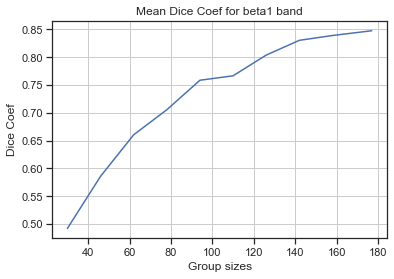

In [47]:
sns.set(style = "ticks")
sns.lineplot(x = extended_sizes,y = meansd).set(title = 'Mean Dice Coef for beta1 band')
plt.xlabel("Group sizes")
plt.ylabel("Dice Coef")
plt.grid()
plt.show()

In [48]:
def list_of_dices(analyzer, num_it, group_size, num_perms, band, thres):
    '''
    Returns significant channels for given group size and band
    
    num_it : int, number of iterations of creating groups of fixed size
    group_size : int, size of a subgroup
    num_perms : int, number of repetitions or psevdo experiments
    band : int
    '''
    channels = []
    for i in range(num_it):
        channels.append(analyzer.compute_sign_differences(size=group_size,
                                                               band=band,
                                                               num_perms=num_perms,
                                                               thres=thres)['chan_names'].tolist())
        i+=1
    #print(f"Significant channels for group of size {group_size} for band {analyzer.key_bands[band]}")
    dice_coef = []
    for i in range(len(channels)):
        if i == len(channels)-1:
            return dice_coef
        else:
            dice_coef.append(dice(set(channels[i]),
                                  set(channels[i+1])))

In [50]:
list_of_dices(analyzer, num_it = 100, group_size = 30, num_perms = 10000, band = 5, thres = 0.01)
# list of dices for beta1 band for group size 30 for 100 iterations

[0.53125,
 0.4827586206896552,
 0.43902439024390244,
 0.5714285714285714,
 0.6,
 0.425531914893617,
 0.5405405405405406,
 0.45454545454545453,
 0.44,
 0.5,
 0.42857142857142855,
 0.23809523809523808,
 0.36,
 0.4,
 0.36363636363636365,
 0.631578947368421,
 0.5652173913043478,
 0.5411764705882353,
 0.4838709677419355,
 0.44155844155844154,
 0.4358974358974359,
 0.5660377358490566,
 0.5666666666666667,
 0.52,
 0.5161290322580645,
 0.6197183098591549,
 0.45901639344262296,
 0.5714285714285714,
 0.5925925925925926,
 0.5573770491803278,
 0.5306122448979592,
 0.5263157894736842,
 0.8,
 0.6458333333333334,
 0.3225806451612903,
 0.4,
 0.4057971014492754,
 0.38461538461538464,
 0.2702702702702703,
 0.2857142857142857,
 0.3728813559322034,
 0.42105263157894735,
 0.5245901639344263,
 0.5,
 0.391304347826087,
 0.4126984126984127,
 0.5538461538461539,
 0.6153846153846154,
 0.6031746031746031,
 0.6557377049180327,
 0.5365853658536586,
 0.6436781609195402,
 0.6,
 0.38596491228070173,
 0.44897959183673

In [56]:
def list_of_dices_per_band(analyzer, num_it, sizes, num_perms, band, thres):
    '''
    Returns a list of dices for all sizes for given band
    
    sizes : list, list of sizes
    num_it : int, number of iterations of creating groups of fixed size
    num_reps : int, number of repetitions or psevdo experiments
    factor : float from 0 to 1
    band : int
    '''
    dices_per_band = []
    for i in range(len(sizes)):
        channels = []
        for j in range(num_it):
            analyzer.get_subgroup(sizes[i])
            channels.append(analyzer.compute_sign_differences(band=band,
                                                               num_perms=num_perms,
                                                               thres=thres)['chan_names'].tolist())
            j+=1
    #print(f"Significant channels for group of size {group_size} for band {analyzer.key_bands[band]}")
        dice_coef = []
        for k in range(len(channels)):
            if k == len(channels)-1:
                break
            else:
                dice_coef.append(dice(set(channels[k]),
                                      set(channels[k+1])))
            dice_coef.sort()
        dices_per_band.append(dice_coef)
    return dices_per_band
# returns a list of dices for groups of different sizes, same band

In [59]:
bands = []
for i in analyzer.key_bands.values():
    bands.append(i)
keys = []
for i in analyzer.key_bands.keys():
    keys.append(i)

In [66]:
%%time
# creates a dictionary of all sizes and bands
dices_per_bands = {}
for i in range(len(analyzer.key_bands.values())):
    dices_per_bands[f'{bands[i]}'] = list_of_dices_per_band(analyzer, num_it = 100, sizes = sizes, num_perms = 10000,
                                                            band = keys[i], thres = 0.01)

CPU times: user 53min 43s, sys: 1min 48s, total: 55min 31s
Wall time: 56min 12s


In [67]:
df = pd.DataFrame.from_dict(dices_per_bands)
df.insert(0, "size", sizes, True)

In [68]:
df

,size,delta,theta,alpha1,alpha2,beta1,beta2,gamma
0,30,"[0.20689655172413793, 0.21621621621621623, 0.2...","[0.21052631578947367, 0.24561403508771928, 0.2...","[0.35443037974683544, 0.4580152671755725, 0.46...","[0.7340425531914894, 0.7346938775510204, 0.743...","[0.5365853658536586, 0.556390977443609, 0.5714...","[0.4186046511627907, 0.41975308641975306, 0.43...","[0.16326530612244897, 0.20408163265306123, 0.2..."
1,59,"[0.16129032258064516, 0.2222222222222222, 0.23...","[0.20408163265306123, 0.24390243902439024, 0.2...","[0.4409448818897638, 0.4900662251655629, 0.496...","[0.6321243523316062, 0.6892655367231638, 0.699...","[0.5161290322580645, 0.5172413793103449, 0.547...","[0.47619047619047616, 0.4935064935064935, 0.50...","[0.23255813953488372, 0.24489795918367346, 0.2..."
2,89,"[0.17073170731707318, 0.2153846153846154, 0.24...","[0.09302325581395349, 0.11764705882352941, 0.2...","[0.34782608695652173, 0.48598130841121495, 0.4...","[0.7065868263473054, 0.7150837988826816, 0.733...","[0.42735042735042733, 0.48214285714285715, 0.4...","[0.2692307692307692, 0.29357798165137616, 0.43...","[0.09375, 0.125, 0.15384615384615385, 0.179104..."
3,118,"[0.21052631578947367, 0.325, 0.333333333333333...","[0.17142857142857143, 0.2857142857142857, 0.28...","[0.47058823529411764, 0.5, 0.5050505050505051,...","[0.6767676767676768, 0.6946107784431138, 0.708...","[0.5227272727272727, 0.5333333333333333, 0.537...","[0.4, 0.43010752688172044, 0.43373493975903615...","[0.11538461538461539, 0.1951219512195122, 0.2,..."
4,177,"[0.21428571428571427, 0.24242424242424243, 0.2...","[0.2127659574468085, 0.21428571428571427, 0.23...","[0.3655913978494624, 0.41304347826086957, 0.47...","[0.6746987951807228, 0.686046511627907, 0.6863...","[0.5233644859813084, 0.5242718446601942, 0.554...","[0.38636363636363635, 0.4948453608247423, 0.5,...","[0.0392156862745098, 0.08695652173913043, 0.15..."


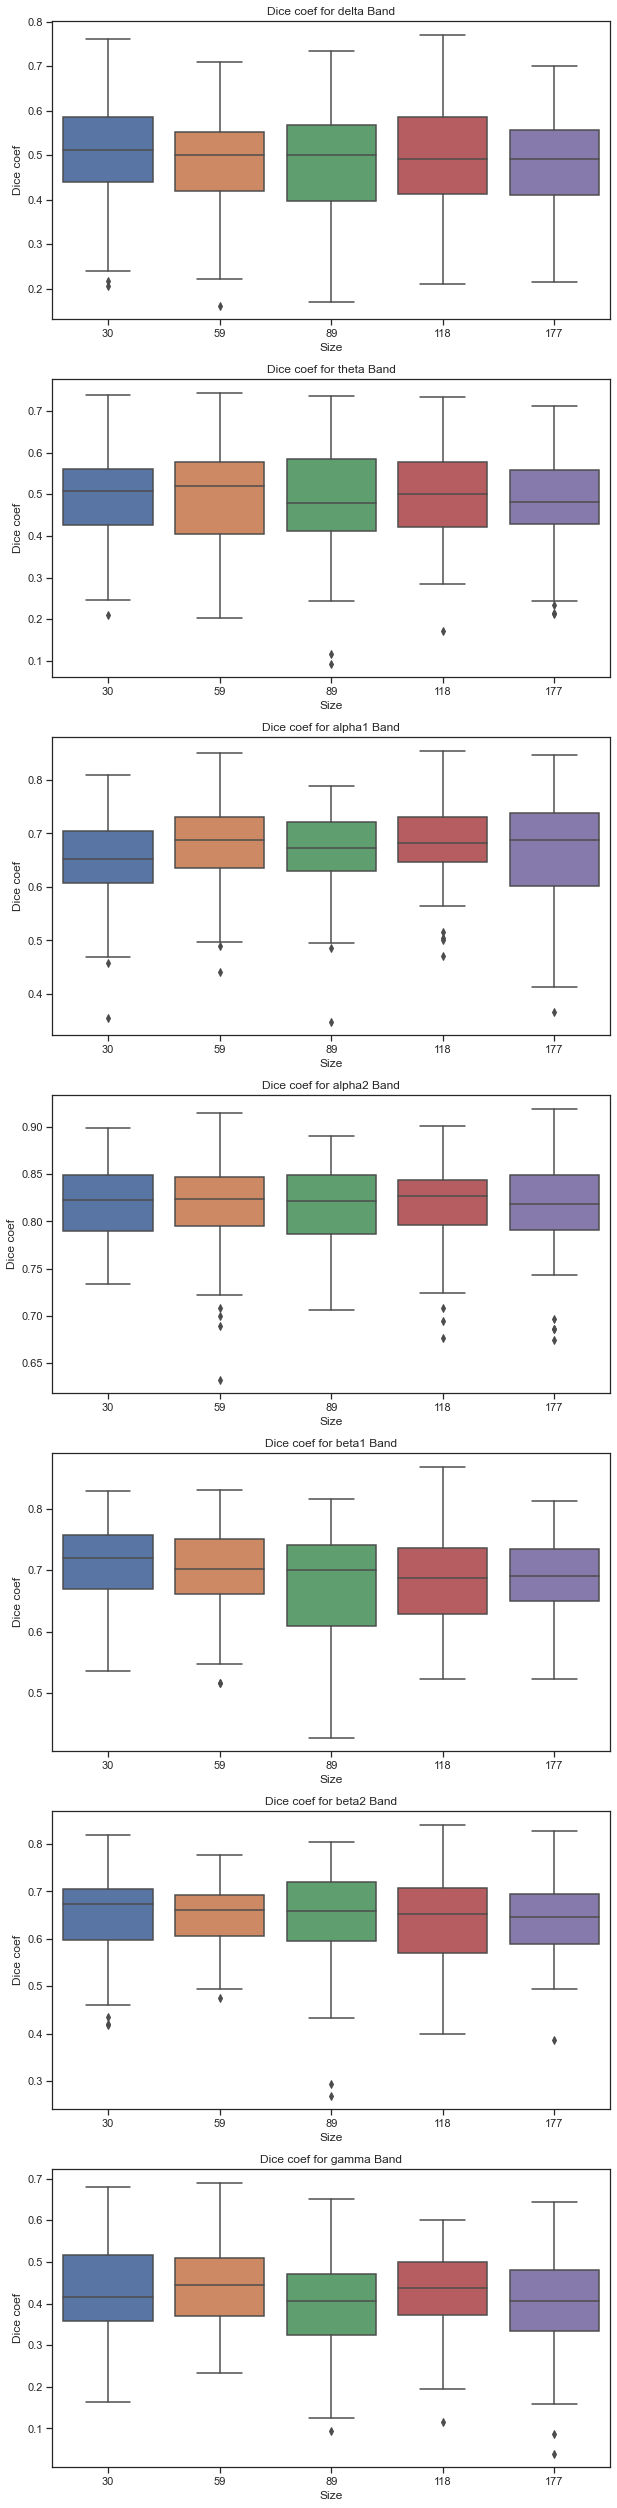

In [69]:
#num_perms = 10,000
fig, axs = plt.subplots(7, 1, figsize=(10, 45))
for i in range(len(bands)):
    sns.boxplot(data=df.explode(bands[i]), x = "size", y = bands[i], 
                ax = axs[i]).set(title = f'Dice coef for {bands[i]} Band', xlabel = 'Size', ylabel = 'Dice coef')
plt.show()

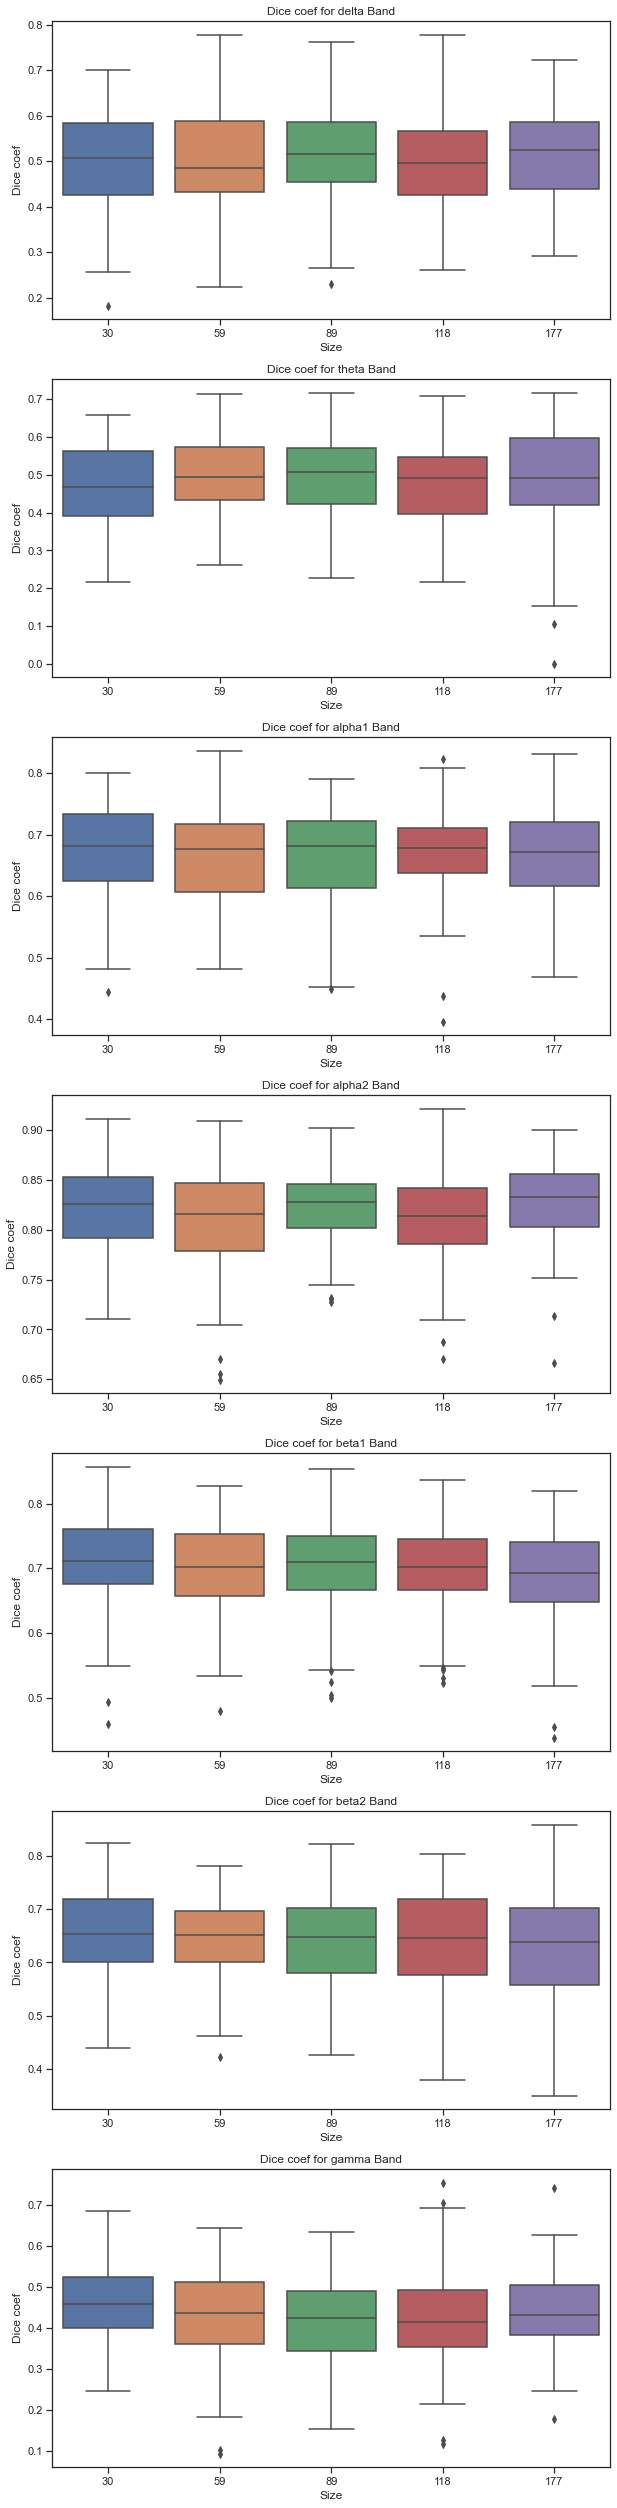

In [65]:
#num_perms = 1,000
fig, axs = plt.subplots(7, 1, figsize=(10, 45))
for i in range(len(bands)):
    sns.boxplot(data=df.explode(bands[i]), x = "size", y = bands[i], 
                ax = axs[i]).set(title = f'Dice coef for {bands[i]} Band', xlabel = 'Size', ylabel = 'Dice coef')
plt.show()